# 最小二乗法

In [77]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import statsmodels.api as sm

In [78]:
UN = np.array(pd.read_csv('dataset/UN.csv').values[:, 1:3]).astype('float64')
print(UN.shape)

UN = UN[~np.isnan(UN).any(axis=1),:]
print(UN.shape)

(207, 2)
(193, 2)


In [79]:
logUN = np.log(UN)
x = logUN[:,1].reshape(-1,1); y = logUN[:,0]
const_x = sm.add_constant(x)
lr = sm.OLS(y, const_x).fit()
print(lr.params)

[ 7.0452008  -0.49320262]


In [80]:
lr.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                 Results: Ordinary least squares
=================================================================
Model:              OLS              Adj. R-squared:     0.654   
Dependent Variable: y                AIC:                348.5429
Date:               2021-06-02 16:47 BIC:                355.0683
No. Observations:   193              Log-Likelihood:     -172.27 
Df Model:           1                F-statistic:        363.7   
Df Residuals:       191              Prob (F-statistic): 4.32e-46
R-squared:          0.656            Scale:              0.35266 
-------------------------------------------------------------------
          Coef.    Std.Err.      t       P>|t|     [0.025    0.975]
-------------------------------------------------------------------
const     7.0452     0.1991    35.3790   0.0000    6.6524    7.4380
x1       -0.4932     0.0259   -19.0697   0.0000   -0.5442   -0.4422
-----------------------------------------------------------------
Omnibus:              10.055       Durbin-Watson:          1.864 
Prob(Omnibus):        0.007        Jarque-Bera (JB):       21.166
Skew:                 0.097        Prob(JB):               0.000 
Kurtosis:             4.611        Condition No.:          36    
=================================================================

"""

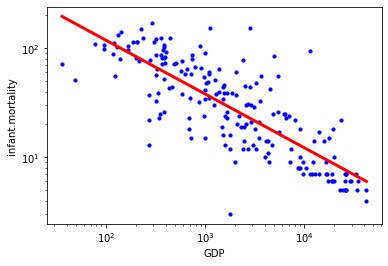

In [81]:
x_axis = np.linspace(x.min(), x.max(), 100).reshape(-1, 1)
const_x_axis = sm.add_constant(x_axis)
y_pred = lr.predict(const_x_axis)
plt.xlabel('GDP'); plt.ylabel('infant.mortality')
plt.xscale("log"); plt.yscale("log")
plt.scatter(UN[:, 1], UN[:, 0], s=10, c='blue')
plt.plot(np.exp(x_axis), np.exp(y_pred), 'r-', lw=3)
plt.show()

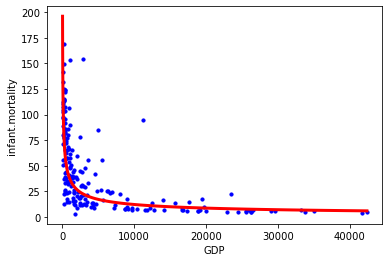

In [82]:
x_axis = np.linspace(x.min(), x.max(), 100).reshape(-1, 1)
const_x_axis = sm.add_constant(x_axis)
y_pred = lr.predict(const_x_axis)
plt.xlabel('GDP')
plt.ylabel('infant.mortality')
#plt.xscale("log"); plt.yscale("log")
plt.scatter(UN[:, 1], UN[:, 0], s=10, c='blue')
plt.plot(np.exp(x_axis),np.exp(y_pred), 'r-', lw=3)
plt.show()

# ロバスト回帰

In [83]:
data = np.array(pd.read_csv('dataset/Davis.csv') .values[:,1:3]).astype('float64')
data = data[~np.isnan(data).any(axis=1),:]
x = data[:,0].reshape(-1,1); y = data[:,-1]
const_x = sm.add_constant(x)
lr = sm.OLS(y, const_x).fit()
lr.params

array([1.60093116e+02, 1.50864502e-01])

In [84]:
# 外れ値を除いたデータに最小二乗法を適用
print(x.shape, y.shape)
print(np.delete(x, 11, 0).shape, np.delete(y, 11, 0).shape)
lr2 = sm.OLS(np.delete(y, 11, 0), np.delete(const_x, 11, 0)).fit()
print("lr.params:", lr2.params)
print("lr.scale:", lr2.scale)

(200, 1) (200,)
(199, 1) (199,)
lr.params: [136.83660744   0.51689358]
lr.scale: 32.67621970292367


In [85]:
rlm = sm.RLM(y, const_x).fit() # Huber 損失によるロバスト推定
print("rlm.params:", rlm.params)
print("rlm.scale:", rlm.scale)

rlm.params: [137.81427721   0.50076743]
rlm.scale: 5.71763465616924


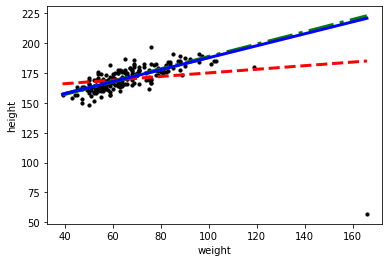

In [86]:
x_axis = np.linspace(x.min(), x.max(), 100).reshape(-1, 1)
const_x_axis = sm.add_constant(x_axis)
plt.xlabel('weight'); plt.ylabel('height')
plt.scatter(x, y, s=10, c='black')
plt.plot(x_axis, lr.predict(const_x_axis), 'r--', lw=3) #最小２乗法による予測点
plt.plot(x_axis, lr2.predict(const_x_axis), 'g-.', lw=4) #外れ値を除いた最小２乗法
plt.plot(x_axis, rlm.predict(const_x_axis), 'b-', lw=3) #ロバスト推定による予測点
plt.show()

In [87]:
rlm = sm.RLM(y, const_x, M=sm.robust.norms.Hampel()).fit()
print("rlm.params:", rlm.params, ", rlm.scale:", rlm.scale)

rlm_tb = sm.RLM(y, const_x, M=sm.robust.norms.TukeyBiweight()).fit()
print("rlm_tb.params:", rlm_tb.params, ", rlm_tb.scale:", rlm_tb.scale)

rlm.params: [136.24027068   0.52543712] , rlm.scale: 5.420989982024841
rlm_tb.params: [135.63061588   0.53426083] , rlm_tb.scale: 5.453397062997567


# Ridge 回帰

In [88]:
alpha = 1
n = 100
degree = 8
pardim = degree+1
x = np.random.uniform(-2, 2, n)
y = np.sin(2*np.pi*x)/x + np.random.normal(scale=0.5, size=n)
spr_x = np.power.outer(x, np.arange(pardim))
print("x's shape:", x.shape, "; super x's shape:", spr_x.shape)
IE = np.identity(spr_x.shape[1]); IE[0,0] = 0
np.linalg.solve(np.dot(spr_x.T, spr_x) + alpha*IE, np.dot(spr_x.T, y))

x's shape: (100,) ; super x's shape: (100, 9)


array([ 3.55812894,  0.00726876, -5.98779002,  0.21312844,  2.81918927,
       -0.1221746 , -0.48380714,  0.01631922,  0.02234519])

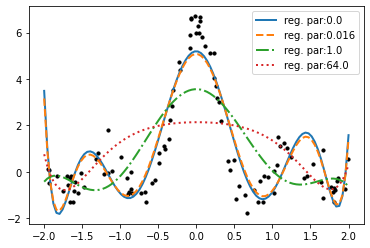

In [89]:
plt.scatter(x, y, c='black', s=10) # データ点プロット
x_axis = np.linspace(-2, 2, 100) # テスト点
spr_x_test = np.power.outer(x_axis, np.arange(pardim))
a = np.array([0, 2**(-6), 1, 2**6]) # 正則化パラメータの候補

ls = ['-', '--', '-.', ':']

for i in np.arange(a.size):
    theta = np.linalg.solve(np.dot(spr_x.T, spr_x)+a[i]*IE,
    np.dot(spr_x.T,y))
    py = np.dot(spr_x_test, theta)
    plt.plot(x_axis, py, label="reg. par:" +str(round(a[i],3)), ls=ls[i],lw=2)

plt.legend()
plt.show()

# カーネル回帰分析

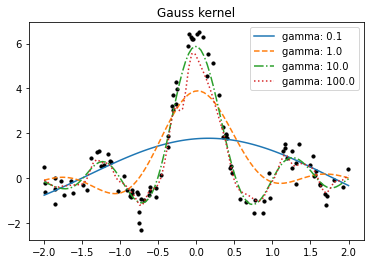

In [90]:
from sklearn.kernel_ridge import KernelRidge

n = 100
x = np.random.uniform(-2, 2, n); X = x.reshape(-1, 1)
y = np.sin(2*np.pi*x)/x + np.random.normal(scale=0.5,size=n)

x_axis = np.linspace(-2, 2, 100) # テスト点 
g = np.array([0.1, 1, 10, 100]) # gamma の候補

l = ['-', '--', '-.', ':'] # プロットのラインスタイル

plt.title('Gauss kernel') # データ点プロット
plt.scatter(x, y, c='black', s=10) # gamma の候補毎のフィッティング

for i in np.arange(len(g)):
    kr = KernelRidge(alpha=1, kernel='rbf', gamma=g[i]) # データへのあてはめ
    kr.fit(X, y) # 予測値の計算
    py = kr.predict(x_axis.reshape(-1, 1))
    plt.plot(x_axis, py, label="gamma: "+str(round(g[i],3)), ls=l[i])
    
plt.legend()
plt.show()